# Housing Price Prediction

This notebook is about predicting the house price using the [Ames Housing Price Dataset](https://www.kaggle.com/c/home-data-for-ml-course). 

Lets start with importing all the necessary python modules to play with the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

%matplotlib inline

## Understanding the data
We have provided a training dataset and a test datset. We need to read the data in and explore the dataset.

In [2]:
#Read the data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.shape

(1460, 81)

In [5]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#Columns having numeric data
train_data.select_dtypes(exclude = ['object']).describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#Columns having string data
train_data.select_dtypes(include = ['object']).describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


The training dataset consist of 81 fields and 1460 records. Among which 38 fields are numerical columns including SalePrice and Id(Unique identifier for each record). 

### 1. Finding the relationship
We need to examin wheather these features are correlated with SalePrice. 

#### Numeric Variables

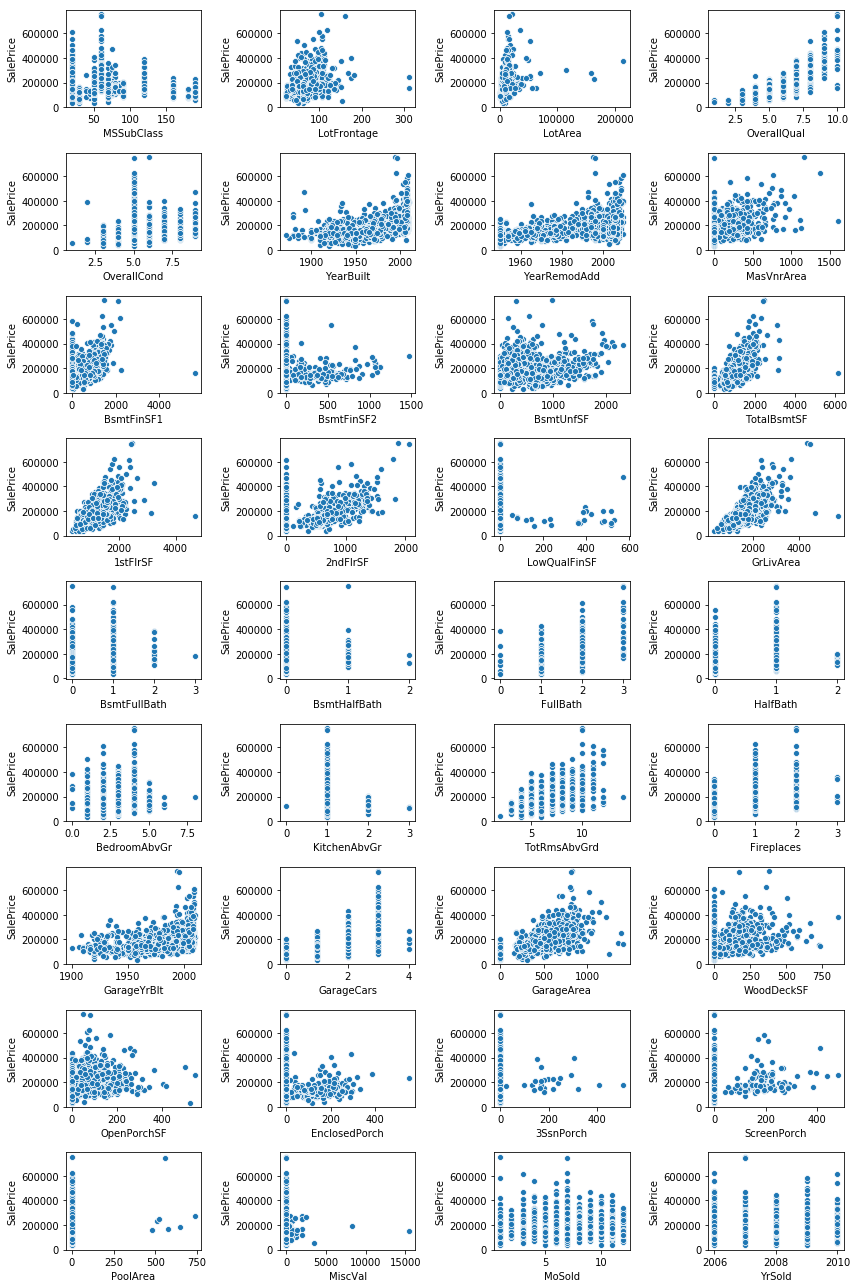

In [8]:
#target:SalePrice
target = train_data.SalePrice

# Select the numeric features
numeric_features = train_data.select_dtypes(exclude= 'object').copy()
# Drop the target and Id from this Dataframe
numeric_features = numeric_features.drop(["SalePrice", "Id"], axis = 1)

#Scatterplot: Numerical features vs. SalePrice
fig_scatter = plt.figure(figsize = (12, 18))
for i in range(len(numeric_features.columns)):
    fig_scatter.add_subplot(9, 4, i+1)
    sns.scatterplot(numeric_features.iloc[:,i], target)
plt.tight_layout()
plt.show()

Some features like overall quality, ground living area are higly correlated with the sale price. As there is a linear relationship, we can further checking how the variables are distributed.

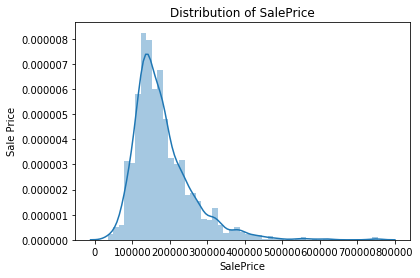

In [9]:
# Distribution of target: SalePrice
sns.distplot(target)
plt.title('Distribution of SalePrice')
plt.ylabel('Sale Price')
plt.show()

In [10]:
print(skew(target))
print(kurtosis(target))

1.880940746034036
6.509812011089439


From the histogram and skewness value, its clear that the target data is highly positively skewed(right skewed). We need to normalize this inorder to make good predictions by the model. Logarithm transformation is the strong way to reduce the skewness of the data.

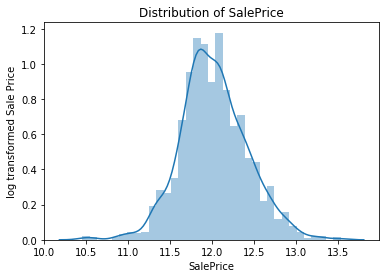

In [11]:
#Checking the distribution of the target: SalePrice
sns.distplot(np.log(train_data.SalePrice))
plt.title('Distribution of SalePrice')
plt.ylabel('log transformed Sale Price')
plt.show()

Lets see the skewness and kurtosis after transformation

In [12]:
print(skew(np.log(train_data.SalePrice)))
print(kurtosis(np.log(train_data.SalePrice)))

0.1212103673013655
0.8026555069117713


As we normalize the target. we need to find whether there is any skewed feature or not. We need to transform if there are any. 

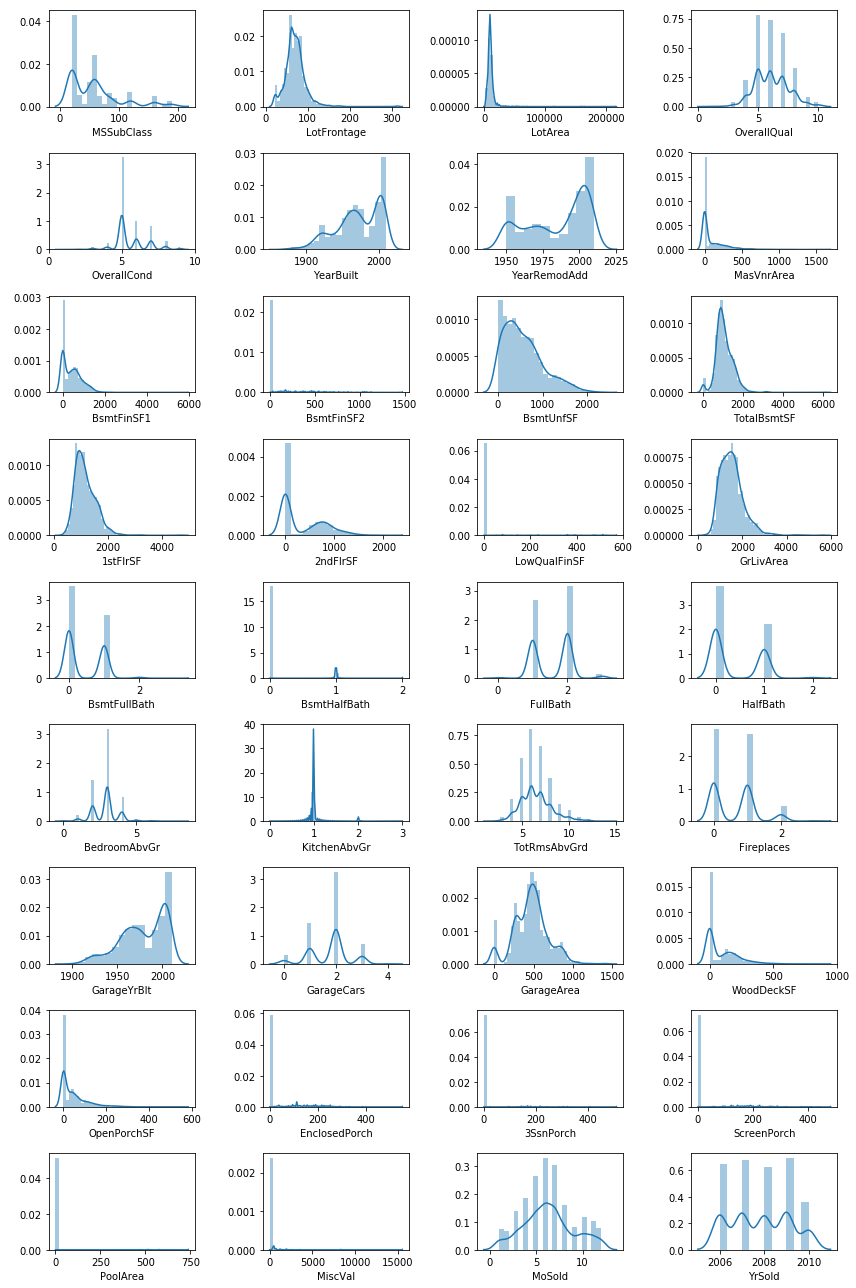

In [13]:
#Distribution of other numerical features
fig_dist = plt.figure(figsize = (12, 18))
for i in range(len(numeric_features.columns)):
    fig_dist.add_subplot(9, 4, i+1)
    sns.distplot(numeric_features.iloc[:,i].dropna())
    plt.xlabel(numeric_features.columns[i])
plt.tight_layout()
plt.show()

Features like LotFrontage, LotArea, BsmtFinSF1, GrLivArea, 1stFlrSF are highly positively skewed. 

#### Categorical Variables
There is 43 categorical variables in the dataset

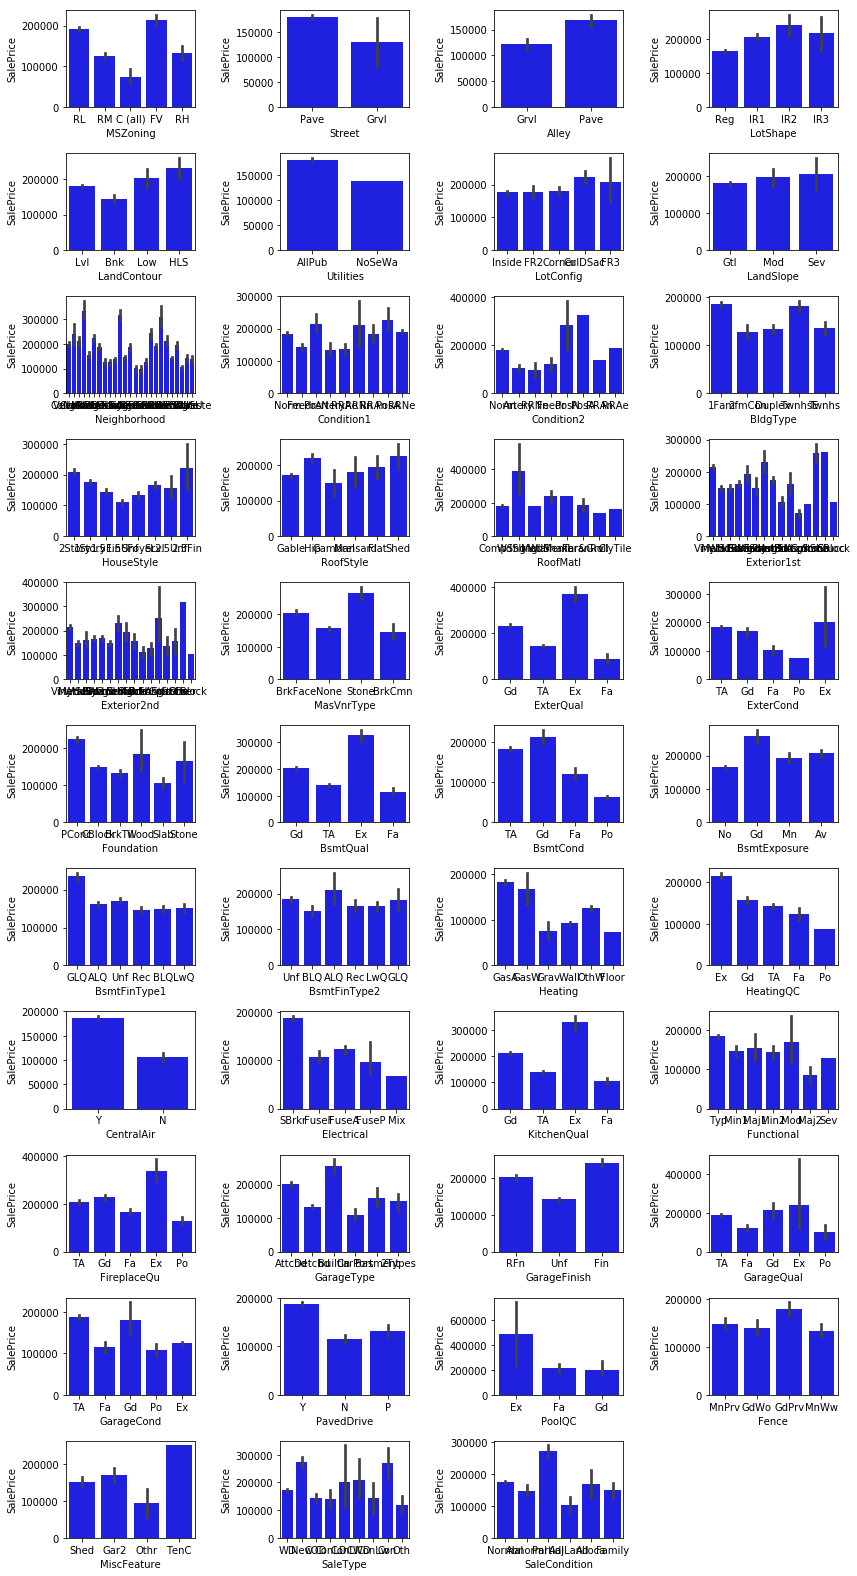

In [14]:
# Select the categorical features
categorical_features = train_data.select_dtypes(include= 'object').copy()

#Relation between SalePrice and Categorical features
fig_bar = plt.figure(figsize = (12, 22))
for i in range(len(categorical_features.columns)):
    fig_bar.add_subplot(11, 4, i+1)
    sns.barplot(x = categorical_features.iloc[:,i], y = target, color = "blue")
plt.tight_layout()
plt.show()

Sales price varies with category in some features like MSZoning, Neighborhood, Central Air, etc. Sale Price for categories in some features like LotConfig, LandSlop does not vary much.

### Finding Outliers
Linear regression is very sensitive to *outliers*. It can terribly affect the regression line and the forecasted  values. 

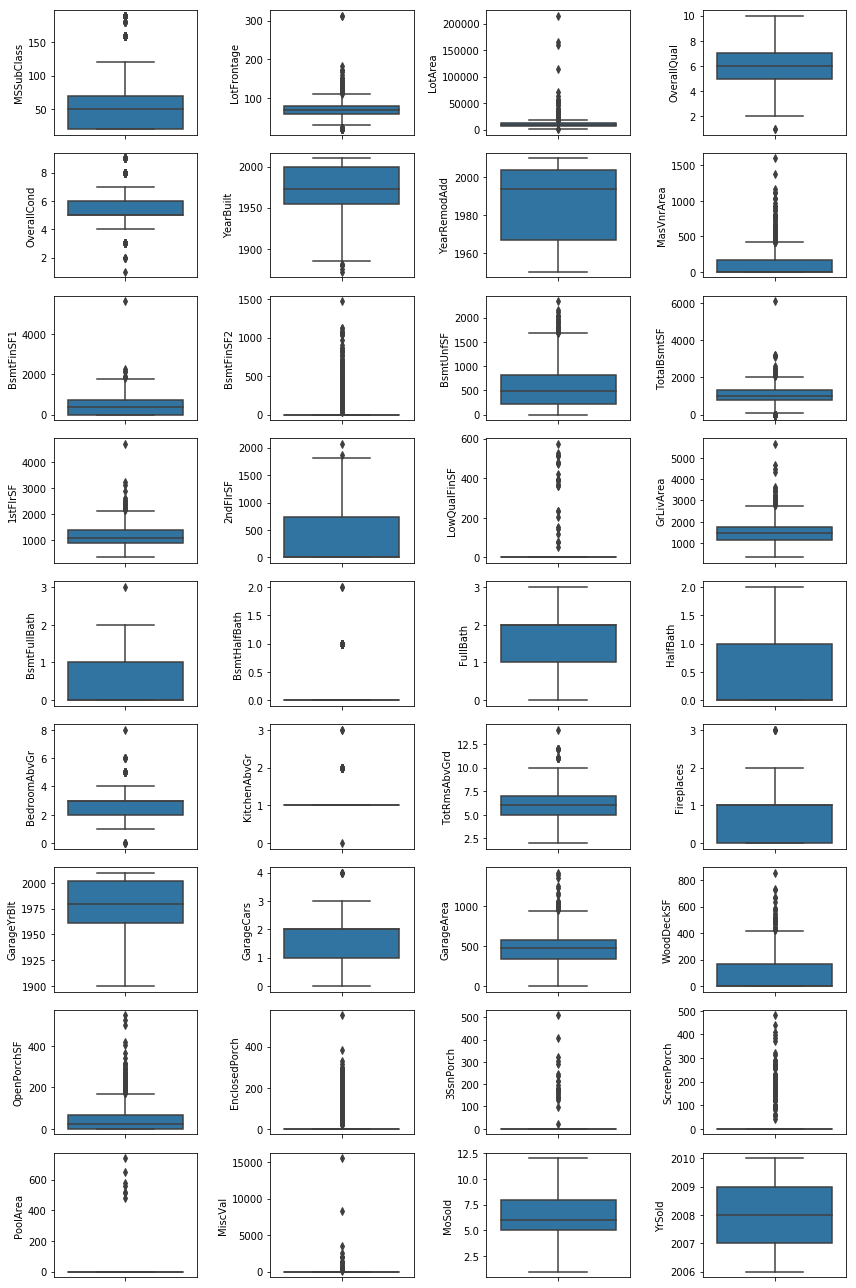

In [15]:
#Boxplot to find the outliers: Numeric features
fig_box = plt.figure(figsize = (12, 18))
for i in range(len(numeric_features.columns)):
    fig_box.add_subplot(9, 4, i+1)
    sns.boxplot(y = numeric_features.iloc[:,i])
    
plt.tight_layout()
plt.show()

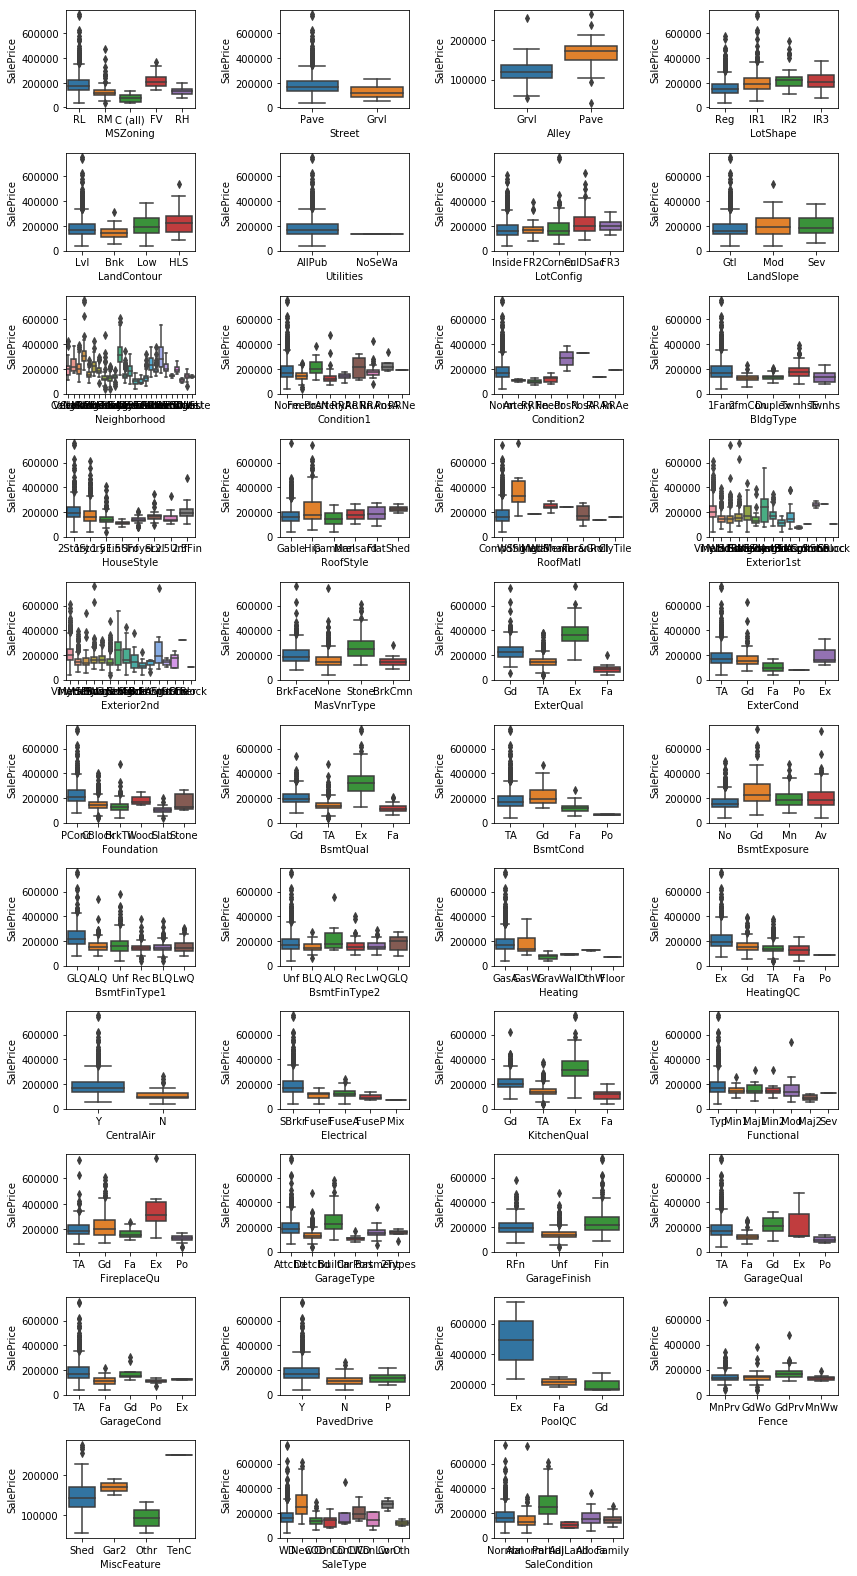

In [16]:
#Outliers in Categorical features
fig_boxplot = plt.figure(figsize = (12, 22))
for i in range(len(categorical_features.columns)):
    fig_boxplot.add_subplot(11, 4, i+1)
    sns.boxplot(x = categorical_features.iloc[:,i], y = target)
plt.tight_layout()
plt.show()

In [308]:
categorical_features.isna().sum().sort_values(ascending = False).head(17)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
Condition2         0
dtype: int64

**Insights:**
* There is a linear relationship between predictor and response.
* As there is multiple independent variables(both numeric and categorical), we cannot go for simple linear regression
* Response (SalePrice) is continuous data.
* SalePrice some other features are skewed: Need to log transform these.
* There is missing values and outliers in the dataset: we need to fix these.

### Multicollinearity 



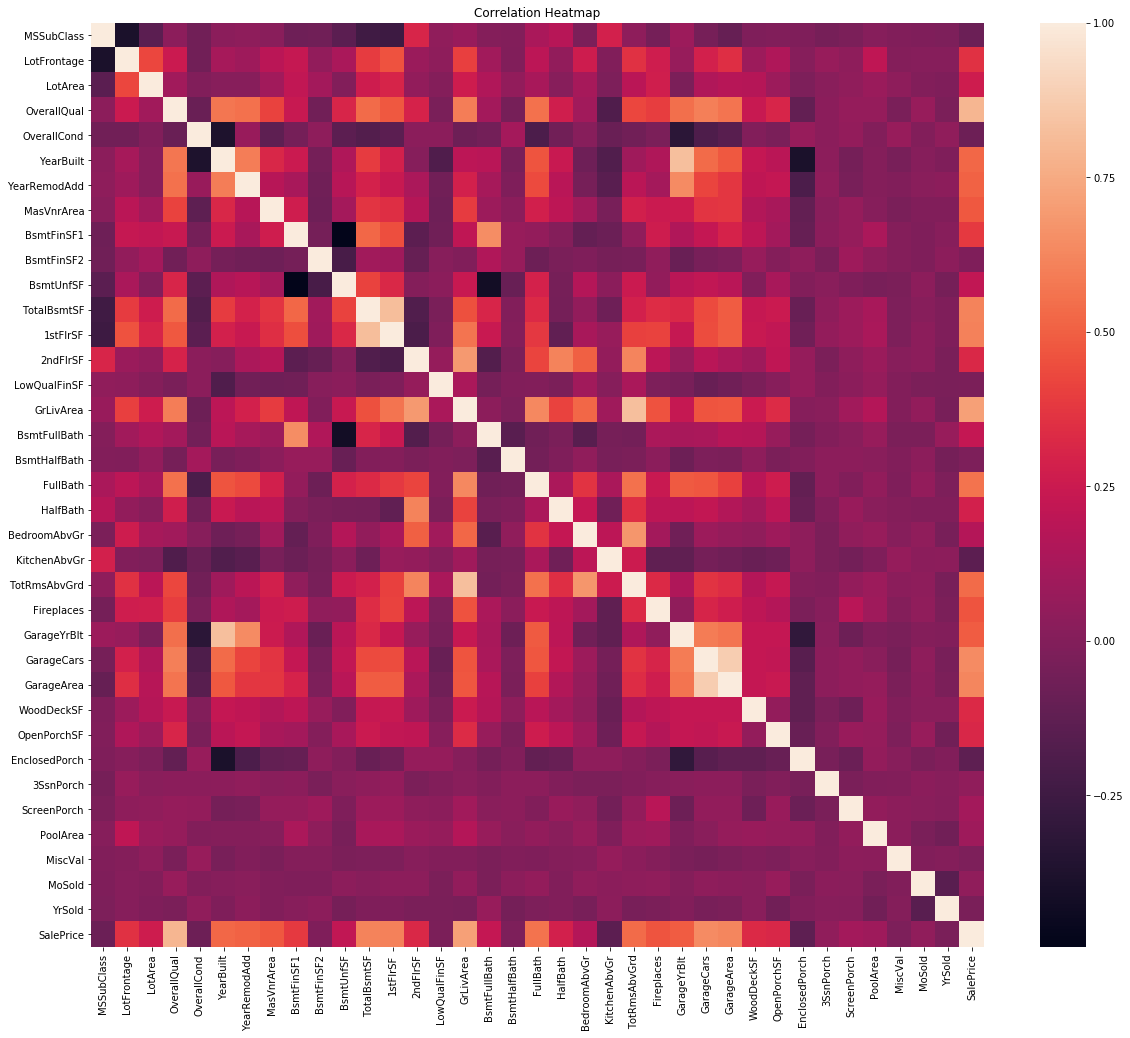

In [17]:
#Correlation heatmap of the numeric variables
corr_df = train_data.drop(['Id'], axis = 1).corr()
fig, ax = plt.subplots(figsize = (20, 17))
plt.title("Correlation Heatmap")
sns.heatmap(corr_df)
plt.show()

In [104]:
#numeric variables having high correlation with SalePrice
corr_df['SalePrice'].sort_values(ascending = False)#.head(20)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Its clear from the heatmap that there is collinearity among some predictors. Predictors having high correlations are:
* GarageArea - GarageCars (0.88)
* GarageYrBuilt - YearBuilt (0.83)
* GrLivArea - TotRmsAbvGrd (0.83)
* TotalBsmtSF - 1stFlrSF (0.82) 

We need to remove GarageArea, GarageYrBlt, TotRmsAbvGrd, 1stFlrSF from these as the other predictors are highly correlated with SalePrice. Variables with low correlation with Price (KitchenAbvGr, EnclosedPorch, MSSubClass,etc) also need to be removed. 

### Missing / Null Values in Numerical Columns


In [292]:
numeric_features.isna().sum().sort_values(ascending = False).head()

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
YrSold           0
BsmtFinSF2       0
dtype: int64

## Preparing data for Modeling

In [262]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, learning_curve, validation_curve, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
#from xgboost import XGBRegressor

### 1. Remove Outliers

We will be removing outliers from the features which are highly correlated with SalePrice.


In [189]:
train_df = train_data.copy().drop(train_data[(train_data['GrLivArea'] > 4000) &
                                            (train_data['SalePrice'] < 200000)].index)

train_df = train_df.drop(train_df[(train_df['TotalBsmtSF'] > 3000) &
                                 (train_df['SalePrice'] < 300000)].index)


In [190]:
#sns.scatterplot(x= train_df.GrLivArea, y = train_df.SalePrice)
#plt.show()

### 2. Scaling Data

There is 0 value in TotalBsmtSF. While transforming this using log we'll get infinity. Inorder to avoid that we need to add a small number with 0.

In [179]:
train_normalized = train_df.copy()
train_normalized['SalePrice'] = np.log(train_normalized['SalePrice'])

#Normalize GrLivArea
#train_normalized['GrLivArea'] = np.log(train_normalized['GrLivArea'])

#train_normalized[(train_normalized['TotalBsmtSF'] == 0)]
#Normalize TotalBsmtSF
#train_normalized['TotalBsmtSF'] = np.log(train_normalized['TotalBsmtSF'])

#one = np.log(2)
#np.log(2)

#sns.distplot(train_normalized.TotalBsmtSF)
#plt.show()

In [359]:
#Select the features which are highly correlated with SalePrice
features = ['OverallQual','GrLivArea', 'GarageCars',
            'TotalBsmtSF', 'FullBath','YearBuilt', 'YearRemodAdd',
            'Fireplaces', 'BsmtFinSF1', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF',
            'SaleCondition', 'Functional', 'CentralAir', 'Heating', 'Exterior2nd','ExterQual', 'RoofMatl',
            'Condition1', 'LotConfig', 'LandSlope', 
            'Neighborhood', 'KitchenQual', 'MSZoning',  
            'ExterQual']
X = train_normalized[features]
y = train_normalized.SalePrice
encoded_X = pd.get_dummies(X)

#Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(encoded_X, y, random_state = 1)

#function to inverse saleprice
def inverse_log(x):
    return np.exp(x)

# Applying Different Algorithms
Apply different ML Algorithms and statistical methods to build the model and compare their performance.

In [360]:
model_linear = LinearRegression()
model_linear.fit(train_X, train_y)
predict_linear = model_linear.predict(val_X)
mae_linear = mean_absolute_error(inverse_log(predict_linear), 
                                 inverse_log(val_y))
mae_df = pd.Series()
mae_df.index.name = 'Algorithms'
mae_df['LinearRegression'] = mae_linear
mae_linear


14855.285072622499

Find the best values for the parameters max_depth and n_estimators using GridSearchCV.

In [258]:
#Use default value of 10 for n_estimators
model_rf = RandomForestRegressor(n_estimators = 10, random_state = 4)
param = {'max_depth':[2,3,4,5,6, 7, 8, 9, 10,11,12,13,14,15,16,17,18]}
grid = GridSearchCV(model_rf, param, cv = 3)
grid.fit(train_X, train_y)
grid.best_params_

{'max_depth': 8}

In [260]:
model_rf = RandomForestRegressor(max_depth = 8, random_state = 4)
param = {'n_estimators': [100,150,200,250,300,350,400]}
grid = GridSearchCV(model_rf, param, cv = 3)
grid.fit(train_X, train_y)
grid.best_params_

{'n_estimators': 150}

In [261]:
model_rf = RandomForestRegressor(n_estimators = 150,
                                 max_depth = 8,
                                 random_state = 1)
model_rf.fit(train_X, train_y)
predict_rf = model_rf.predict(val_X)
mae_rf = mean_absolute_error(inverse_log(predict_rf), 
                             inverse_log(val_y))

mae_df['RandomForest'] = mae_rf
mae_rf

19452.48089307717

In [229]:
model_dtree = DecisionTreeRegressor(random_state = 1)
model_dtree.fit(train_X, train_y)
predict_dtree = model_dtree.predict(val_X)
mae_dtree = mean_absolute_error(inverse_log(predict_dtree), 
                             inverse_log(val_y))
mae_df['DecisionTree'] = mae_dtree
mae_dtree

25306.833884272328

In [273]:
model_lasso = Lasso(alpha = 0.0001, random_state = 1)
model_lasso.fit(train_X, train_y)
predict_lasso = model_lasso.predict(val_X)
mae_lasso = mean_absolute_error(inverse_log(predict_lasso), 
                             inverse_log(val_y))
mae_df['Lasso'] = mae_lasso
mae_lasso

16884.382039185315

In [281]:
model_ridge = Ridge(alpha = 0.001, random_state = 1)
model_ridge.fit(train_X, train_y)
predict_ridge = model_ridge.predict(val_X)
mae_ridge = mean_absolute_error(inverse_log(predict_ridge), 
                             inverse_log(val_y))
mae_df['Ridge'] = mae_ridge
mae_ridge

16856.59737273634

17273.745190875317

In [290]:
mae_df

Algorithms
LinearRegression    16856.562425
RandomForest        19452.480893
DecisionTree        25306.833884
Lasso               16884.382039
Ridge               16856.597373
ElasticNet          17273.745191
dtype: float64

Among these algorithms LinearRegression gives the least error score.